In [ ]:
import random
import os 
import pandas as pd
from google.colab import drive
from progressbar import ProgressBar
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def generate_dna_sequence(length):
    bases = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(bases) for _ in range(length))

In [ ]:
base_sequence = generate_dna_sequence(10000)

In [ ]:
base_sequence

'CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGGTTCGTACCTCAATGGCTGCATCTGGAGGGTAATGGGGACTAACCAGTAAGGCACGAAAATGAGATTGAACAAAGGTCTTCATAGTAAAGTCGCGAGTGTCTAAATCCAATAGAACGCTTCCTGTAGGTGAGCAAATACCGTAAGTTTCTTACCTTGAGACCTTAGTCCGTCATCAACACTTTTACCAGACGTAGAATTCCACTTTGTCTTGGCTTTCTGGCGCGTCACGCGGAATCCCGGGACGGAATTATCCTGTTTATAGCACCCGTCTTCTATAGAATGCTGATTTAAAATGTAGGTTATCGCCTTACTTTCAAACAGTCTGTCTTCATCCGACGATAGTAAAAAATAGGGGGCGATGCTGTTAGTCAAACTCCAACTACGTTAACTTGCGACCGCACCACGCAGAACTGTGAAATCGTATGTTACGGATATAAGTCGGGGACCACTCAGGAGCCTGACCATGTAGTACGCCTGCGGCGAGCAGAGCTTGCCAAATGTTCCGATTTAAAGCCCGGGTAGATCTTTAAGGATGACGGTCGAACAAGAAGTAGAGCTGCCATGATTCCTCTGTCGTAGGAACATCGATTCCAATTGTCGAGCTTCTGCGTCGTGCTCTGGTTACTAGCCGGTCACGGACAGCCCTCCTGCGCGAAGAATGTGGAGCGATGGTCCGACGTCAGGCTGCTGAACTAAGAACCGGGTCTTCGCATAAAAAGCTCTTAACGTCACCTTTCTGTCTTATCTCGAAGGGCGTGCCAGTTGGCTCCAAGCCTGAACTGGTTATGTGGCGTCTGTGCTGCAGTCTGCGATGTAGCTTTGACGGACAGAATTCTCCGGGGCAATATTCAGGATCTGCCACCGTTGCTACGGGAACCCCCATCTGACAAAGATTACATTTATAGCCGGAGCGAGCCGTCGTGCCGCTTACAAGACAGGGAGACTCCCTCCCC

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/mutation-detection/base_sequence.txt', "w") as text_file:
    text_file.write(base_sequence)

In [ ]:
# Assume we have 20 different mutations of interest, each of length 50 
mutation_indices = random.sample(range(len(base_sequence)), 20)

In [ ]:
mutation_bounds = [(i, i+50) for i in mutation_indices]

In [ ]:
mutation_indices_df = pd.DataFrame(mutation_bounds, columns = ['mutation_start', 'mutation_end'])

In [ ]:
mutation_indices_df.to_csv('/content/drive/MyDrive/mutation-detection/mutation_indices.csv', index=False)

In [ ]:
mutation_indices_df['id'] = mutation_indices_df.index + 1

In [ ]:
# Note that these currently can be overlapping
mutation_indices_df

,mutation_start,mutation_end,id
0,3301,3351,1
1,4560,4610,2
2,5571,5621,3
3,2748,2798,4
4,2154,2204,5
5,9580,9630,6
6,3506,3556,7
7,2582,2632,8
8,5283,5333,9
9,1632,1682,10


In [ ]:
def generate_mutation(base_sequence, start, end, mutation_probability=0.05):
    bases = ['A', 'T', 'C', 'G']
    mutated_sequence = list(base_sequence)
    
    for i in range(start, end):
        
        if random.random() < mutation_probability:
            original_base = base_sequence[i]
            available_bases = [base for base in bases if base != original_base]
            mutated_base = random.choice(available_bases)
            mutated_sequence[i] = mutated_base
            
    return ''.join(mutated_sequence)


def is_harmful_mutation(probability_harmful_mutation):
    return random.random() < probability_harmful_mutation



In [ ]:
# Generate mutations
mutations = []
pbar = ProgressBar()

for _, row in pbar(mutation_indices_df.iterrows()):
    
    mutation_id, start, end = row['id'], row['mutation_start'], row['mutation_end']
    
    for variant in range(100):
      
      mutated_sequence = generate_mutation(base_sequence, start, end)
      
      if len(mutations) == 0 or (mutated_sequence != base_sequence and mutated_sequence not in pd.DataFrame(mutations)['full_mutated_sequence'].tolist()): 
        mutations.append({'mutation_id': mutation_id, 
                          'mutation_variant': variant, 
                          'mutation_start': start, 
                          'mutation_end': end, 
                          'full_mutated_sequence': mutated_sequence,
                          'mutated_subsequence': mutated_sequence[start:end],
                          'harmful': is_harmful_mutation(0.05)})


mutations_df = pd.DataFrame(mutations)

| |                           #                      | 19 Elapsed Time: 0:00:22


In [ ]:
mutations_df.to_csv('/content/drive/MyDrive/mutation-detection/mutation_variants.csv', index=False)

In [ ]:
mutations_df['harmful'].value_counts()

False    1730
True       79
Name: harmful, dtype: int64

In [ ]:
mutations_df

,mutation_id,mutation_variant,mutation_start,mutation_end,full_mutated_sequence,mutated_subsequence,harmful
0,1,0,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATAGAGTTGAACGTCAAATTCAGTT...,False
1,1,1,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTTCCACTACACCTCACAATAGAGTTGAACGTCAAATTCAGTT...,False
2,1,3,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATTGAGTTGAACGTCAAATTCAGTT...,False
3,1,4,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATTGAGTTCAACGTCCAATTCAGTT...,False
4,1,5,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCCTACCACTACACCTCACAATTGAGTTGAACGTCAAATACAGTC...,False
...,...,...,...,...,...,...,...
1804,20,95,198,248,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CTTGAGACCTTAGTCCGTCATCAACACTTTTACCAGACGTTGAATT...,False
1805,20,96,198,248,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CTTGAGACCTTAGTCCGTCATCAACACTTATACCAGACGTGTACTT...,False
1806,20,97,198,248,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CGTGAGACCTCAGTCCGTCATCAACACTTTAACCAGACGTAGAATT...,False
1807,20,98,198,248,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GTTGAGACCTTAGTCCGTCATCAACACTTTTACCAGACGTAGAATT...,False


In [ ]:
pd.DataFrame(mutations_df.groupby(['mutation_id', 'harmful']).size())

0
mutation_id harmful    
1           False    83
            True      7
2           False    85
            True      8
3           False    84
            True      5
4           False    82
            True      3
5           False    90
            True      2
6           False    85
            True      6
7           False    92
            True      1
8           False    83
            True      3
9           False    90
            True      2
10          False    85
            True      8
11          False    93
            True      1
12          False    85
            True      6
13          False    82
            True      8
14          False    88
            True      4
15          False    89
16          False    87
            True      5
17          False    83
            True      4
18          False    84
            True      2
19          False    87
            True      2
20          False    93
            True      2

In [ ]:
# Generate samples for 1000 patients, each with a bit of random noise

patient_sample = mutations_df.sample(1000, replace=True)

In [ ]:
patient_sample['harmful'].value_counts()

False    959
True      41
Name: harmful, dtype: int64

In [ ]:
patient_sample.to_csv('/content/drive/MyDrive/mutation-detection/patient_sample_true_non_noisy_values.csv')

In [ ]:
patient_sample

,mutation_id,mutation_variant,mutation_start,mutation_end,full_mutated_sequence,mutated_subsequence,harmful
1599,18,70,8963,9013,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,AACATGGAGTTACCAGCAATACGATGACTTAAAGATCCGTTTCCAG...,False
728,9,10,5283,5333,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CACCCTCGCCTCCATTTGTGGGAGCTTCCGTGCGTGCGCTTCGTTT...,False
487,6,44,9580,9630,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,ATCTACACCAGGCTATAACGTTACGCAGTTCTAGCACTGTTGGATC...,False
138,2,50,4560,4610,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GTTTGCTCTGCACGATCATCAATCCGGTTACTAAACAGGAACTCGG...,True
841,10,34,1632,1682,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CATGGGTGTGATCGCTGTACGTATAATGTACCGTTTACATTTACAT...,True
...,...,...,...,...,...,...,...
424,5,73,2154,2204,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CCTCGTCTACGTTTCTCTTACGCAAGCGTACTGGCATGTTTTAACC...,False
1075,12,83,4139,4189,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,TGATAGAATAACGCGACTAGAACCCTCTCAGTACGCGGAATCTTCC...,False
85,1,93,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATTGGGTTGAACGTCAAATTCAGTT...,False
854,10,47,1632,1682,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CAGGGGTGTGATCGCTGCACGTATTATGTACCGTTTACATTTACGT...,False


In [ ]:
def apply_noise_to_sequence(sequence, mutation_probability=0.01):
  
  sequence_list = list(sequence)
  bases = ['A', 'T', 'C', 'G']

  for idx, i in enumerate(sequence_list):
     if random.random() < mutation_probability:
       sequence_list[idx] = random.choice(bases)

  return ''.join(sequence_list)

In [ ]:
patient_sample['patient_sequence'] = patient_sample['full_mutated_sequence'].apply(lambda x: apply_noise_to_sequence(x))

In [ ]:
patient_sample.to_csv('/content/drive/MyDrive/mutation-detection/patient_sample_with_noisy_values.csv', index=False)

In [ ]:
patient_sample

,mutation_id,mutation_variant,mutation_start,mutation_end,full_mutated_sequence,mutated_subsequence,harmful,patient_sequence
1599,18,70,8963,9013,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,AACATGGAGTTACCAGCAATACGATGACTTAAAGATCCGTTTCCAG...,False,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
728,9,10,5283,5333,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CACCCTCGCCTCCATTTGTGGGAGCTTCCGTGCGTGCGCTTCGTTT...,False,CGGGGAGGCTTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
487,6,44,9580,9630,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,ATCTACACCAGGCTATAACGTTACGCAGTTCTAGCACTGTTGGATC...,False,TGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
138,2,50,4560,4610,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GTTTGCTCTGCACGATCATCAATCCGGTTACTAAACAGGAACTCGG...,True,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
841,10,34,1632,1682,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CATGGGTGTGATCGCTGTACGTATAATGTACCGTTTACATTTACAT...,True,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
...,...,...,...,...,...,...,...,...
424,5,73,2154,2204,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CCTCGTCTACGTTTCTCTTACGCAAGCGTACTGGCATGTTTTAACC...,False,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
1075,12,83,4139,4189,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,TGATAGAATAACGCGACTAGAACCCTCTCAGTACGCGGAATCTTCC...,False,CGGGGAGGCGTGCCACGCATTATAGGAGGCGAAAAAGGATAAGGGG...
85,1,93,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATTGGGTTGAACGTCAAATTCAGTT...,False,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...
854,10,47,1632,1682,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CAGGGGTGTGATCGCTGCACGTATTATGTACCGTTTACATTTACGT...,False,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...


H - finite set of hypotheses, among which exactly one is the unknown true hypothesis we seek to identify 

A - potentially large set of actions 

"In the context of liquid biopsies, the candidate hypotheses are different types of cancers, and the actions correspond to sequencing individual DNA addresses"

Learner incurs a fixed cost each time an action is selected and seeks to identify the true hypothesis with sufficent confidence at minimum total costs 



Learner is allowed to select actions adaptively



In [ ]:
mutations_df

,mutation_id,mutation_variant,mutation_start,mutation_end,full_mutated_sequence,mutated_subsequence,harmful
0,1,0,9047,9097,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTAGCAGGCCGAGGTTTGGGAGTTGGAACCCCGCATGATACCTTT...,False
1,1,1,9047,9097,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTAGCAAGTAGAGGTTTGGGAGTTGGAACCCTGCATGATACATTT...,False
2,1,3,9047,9097,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTAGCAGGCCGAGGTTTCGGAGTTGGTACCCCGCATGATACCTTT...,False
3,1,4,9047,9097,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTAGCAGGCCGAGGATTGGGAGTTGGAACCCCGCATGATACCTTT...,False
4,1,5,9047,9097,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTAGCAAGACGAGGTTTGGGTGTTGGAACCCCGCATGAGACCTTT...,False
...,...,...,...,...,...,...,...
1798,20,93,9735,9785,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTCAGACCACGGGTTGCATCCGTCGGCGGTTCTGTCGGCACGCTG...,True
1799,20,95,9735,9785,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTCAGACCACGAGTTACATCTGGCGGCGGTTCTGTCGGCACGCTG...,False
1800,20,97,9735,9785,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTCCGACCACGGGTTACATCTGTCGACGGTTCTGTCGGCACGCTC...,False
1801,20,98,9735,9785,CTTGGTGGCGAGAGTTGCGGGAGGCAATCTTGCTGTTCTTAAAGCC...,AGTCATACCACGGGTTACATCTGTGGGCGGTTCAGTCCGCACGCTG...,False


In [ ]:
def diff_mutation_to_base_indices(mutation, base):
  base_df = pd.DataFrame(list(base_sequence), columns = ['base'])
  mutation_df = pd.DataFrame(list(mutation), columns = ['mutation'])
  comp_df = base_df.merge(mutation_df, left_index=True, right_index=True)
  comp_df['match'] = comp_df['base'] == comp_df['mutation'] 
  return comp_df[comp_df['match'] == False].index.tolist()

In [ ]:
harmful_mutations = mutations_df[mutations_df['harmful']].reset_index(drop=True)

In [ ]:
harmful_mutations

,mutation_id,mutation_variant,mutation_start,mutation_end,full_mutated_sequence,mutated_subsequence,harmful
0,1,14,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCTCTACACCCCACAATAGAGTTGAACGCCAAATTCAGAT...,True
1,1,23,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACATCTATACCTCACAATTGAGTTGAACGTCATATTCAGTT...,True
2,1,46,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCGAACCACTAGACCTCACAATTGAGTTCAACGTCAAATTCAGTT...,True
3,1,49,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTGCACCTCACAATTGAATTGAACGGCAAATTCAGTT...,True
4,1,57,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATTGAGTTGAACGTCAAAGGCAGTT...,True
...,...,...,...,...,...,...,...
74,18,47,8963,9013,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,AACCTGGAGTTACCAGCAATACGATGACTTAAAGATCCTTTTTCAG...,True
75,19,38,1032,1082,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,TATGCCTTATCCACATCATGACGTCGAGGCTAATCGATGCACTCTA...,True
76,19,50,1032,1082,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,TATGCCTTATCCACATCAAGACGTCGAGGCTAATCGATGCACGCTA...,True
77,20,90,198,248,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CTTGAGACCTTAGTCCGTCATCAACACTTGTACCAGACGTAGAATT...,True


In [ ]:
harmful_mutations['indices'] = harmful_mutations['full_mutated_sequence'].apply(lambda x: diff_mutation_to_base_indices(x, base_sequence))

In [ ]:
harmful_indices = []

for i in harmful_mutations['indices'].tolist():
  harmful_indices.extend(i)



In [ ]:
pd.Series(harmful_indices).value_counts()

4898    3
9603    3
3309    2
9591    2
4144    2
       ..
9624    1
9588    1
9602    1
3507    1
242     1
Length: 179, dtype: int64

<Axes: ylabel='Density'>

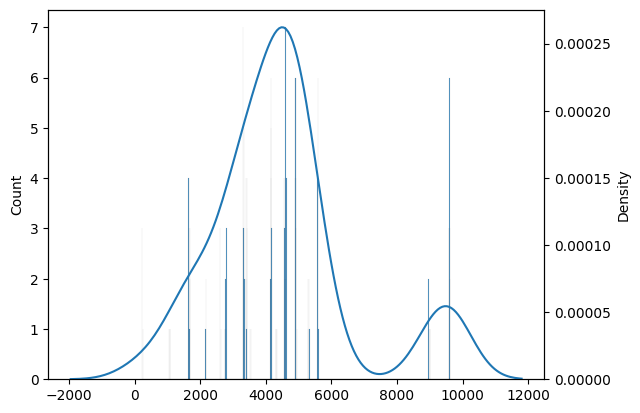

In [ ]:
fig, ax = plt.subplots()
sns.histplot(harmful_indices, ax=ax, bins=1000)
ax2 = ax.twinx()
sns.kdeplot(harmful_indices, ax=ax2)

In [ ]:
len(harmful_indices)

209

In [ ]:
harmful_mutations.to_csv('/content/drive/MyDrive/mutation-detection/harmful_mutations_summary.csv', index=False)

In [ ]:
harmful_mutations

,mutation_id,mutation_variant,mutation_start,mutation_end,full_mutated_sequence,mutated_subsequence,harmful,indices
0,1,14,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCTCTACACCCCACAATAGAGTTGAACGCCAAATTCAGAT...,True,"[3309, 3317, 3324, 3335, 3345]"
1,1,23,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACATCTATACCTCACAATTGAGTTGAACGTCATATTCAGTT...,True,"[3308, 3309, 3313, 3338]"
2,1,46,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCGAACCACTAGACCTCACAATTGAGTTCAACGTCAAATTCAGTT...,True,"[3304, 3305, 3313, 3330]"
3,1,49,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTGCACCTCACAATTGAATTGAACGGCAAATTCAGTT...,True,"[3312, 3327, 3335]"
4,1,57,3301,3351,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,GGCTTACCACTACACCTCACAATTGAGTTGAACGTCAAAGGCAGTT...,True,"[3340, 3341]"
...,...,...,...,...,...,...,...,...
74,18,47,8963,9013,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,AACCTGGAGTTACCAGCAATACGATGACTTAAAGATCCTTTTTCAG...,True,"[8966, 9001, 9012]"
75,19,38,1032,1082,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,TATGCCTTATCCACATCATGACGTCGAGGCTAATCGATGCACTCTA...,True,[1074]
76,19,50,1032,1082,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,TATGCCTTATCCACATCAAGACGTCGAGGCTAATCGATGCACGCTA...,True,"[1050, 1078]"
77,20,90,198,248,CGGGGAGGCGTGCCACCCATTATAGGAGGCGAAAAAGGATAAGGGG...,CTTGAGACCTTAGTCCGTCATCAACACTTGTACCAGACGTAGAATT...,True,[227]


In [ ]:
# 1. limit the number of samples that can be pulled 
# 2. you can only sequence part of the sample - what do you choose? 
# 3. as you vary sample size, when is it "good enough"

In [ ]:
#Algorithm 

selected_actions = []

